# Part 2 - Feature Engineering & EDA

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df=pd.read_csv("../datasets/cleaned_housing_data.csv")

C:\Users\songk\AppData\Local\Temp\ipykernel_27532\415602058.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  housing_df=pd.read_csv("../datasets/cleaned_housing_data.csv")


In [3]:
housing_df.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,sec_sch_affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [4]:
housing_df.shape

(150634, 77)

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

In [6]:
# verify no nulls in dataset
housing_df.isnull().sum().sum()

0

In [7]:
# convert id and postal to string datatype
housing_df['id']=housing_df['id'].map(lambda x: str(x))
housing_df['postal']=housing_df['postal'].map(lambda x: str(x))

In [8]:
# understanding the categorical variables in dataset and their respective unique value count
for i in list(housing_df.select_dtypes(include='object').columns):
    print (i,len(set(housing_df[i].values)))

id 150634
tranc_yearmonth 110
town 26
flat_type 7
block 2514
street_name 553
storey_range 25
flat_model 20
full_flat_type 43
address 9157
residential 1
commercial 2
market_hawker 2
multistorey_carpark 2
precinct_pavilion 2
postal 9125
planning_area 32
mrt_name 94
bus_stop_name 1657
pri_sch_name 177
sec_sch_name 134


In [9]:
# to check if median and middle storey values are different
housing_df[housing_df['mid_storey']!=housing_df['mid']].shape

(0, 77)

In the housing dataset, mid_storey and mid columns have identical values in every row. Will drop mid_storey in this dataset.

In [10]:
set(housing_df['residential'].values)

{'Y'}

We observe that all rows have a value of "Y" for the residential column, which suggests that every unit has residential units in the same block. This column will not be useful for analysis.

In [11]:
for i in ['commercial','market_hawker','multistorey_carpark','precinct_pavilion']:
    print(i,set(housing_df[i].values))

commercial {'N', 'Y'}
market_hawker {'N', 'Y'}
multistorey_carpark {'N', 'Y'}
precinct_pavilion {'N', 'Y'}


As there are only 2 distinct values (Y/N) in commercial, market_hawker, multistorey_carpark and precinct_pavilion columns, we assign a value of 1 to cells containing 'Y'
and 0 to cells containing 'N'. This helps to convert these columns into numerical data for modelling purpose. We will explore the remaining categorical variables subsequently.

In [12]:
# convert commercial,market_hawker,multistorey_carpark and precinct_pavilion to 1s and 0s
for i in ['commercial','market_hawker','multistorey_carpark','precinct_pavilion']:
    housing_df[i]=housing_df[i].map(lambda x: 1 if str(x).upper().strip()=='Y' else 0)

In [13]:
# understanding the continous variables in dataset and their respective unique value count
for i in list(housing_df.select_dtypes(exclude='object').columns):
    print (i,len(set(housing_df[i].values)))

floor_area_sqm 169
lease_commence_date 54
resale_price 3295
tranc_year 10
tranc_month 12
mid_storey 22
lower 22
upper 23
mid 22
floor_area_sqft 169
hdb_age 54
max_floor_lvl 41
year_completed 59
commercial 2
market_hawker 2
multistorey_carpark 2
precinct_pavilion 2
total_dwelling_units 320
1room_sold 2
2room_sold 99
3room_sold 255
4room_sold 200
5room_sold 133
exec_sold 103
multigen_sold 7
studio_apartment_sold 61
1room_rental 11
2room_rental 48
3room_rental 15
other_room_rental 3
latitude 9126
longitude 9098
mall_nearest_distance 9124
mall_within_500m 7
mall_within_1km 16
mall_within_2km 42
hawker_nearest_distance 9126
hawker_within_500m 6
hawker_within_1km 10
hawker_within_2km 20
hawker_food_stalls 52
hawker_market_stalls 70
mrt_nearest_distance 9126
bus_interchange 2
mrt_interchange 2
mrt_latitude 94
mrt_longitude 94
bus_stop_nearest_distance 9125
bus_stop_latitude 2011
bus_stop_longitude 2007
pri_sch_nearest_distance 9126
vacancy 66
pri_sch_affiliation 2
pri_sch_latitude 177
pri_sch

In [14]:
# checking on unique values in 1room_sold and multigen_sold
for i in ['1room_sold','multigen_sold']:
    print(i,set(housing_df[i].values))

1room_sold {0, 255}
multigen_sold {0, 66, 45, 48, 50, 20, 22}


In [15]:
housing_df['1room_sold'].value_counts(ascending=False)

0      150552
255        82
Name: 1room_sold, dtype: int64

In [16]:
housing_df['multigen_sold'].value_counts(ascending=False)

0     150557
66        28
50        14
22        13
20         9
45         9
48         4
Name: multigen_sold, dtype: int64

In [17]:
housing_df[housing_df['1room_sold'].values==255]

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,sec_sch_affiliation,sec_sch_latitude,sec_sch_longitude
1202,13,2016-10,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,...,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344
2029,28,2018-08,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,07 TO 09,31.0,Improved,1975,...,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344
6257,97,2014-12,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,10 TO 12,31.0,Improved,1975,...,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344
6398,60,2012-07,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,...,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344
7367,31,2018-11,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,10 TO 12,31.0,Improved,1975,...,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137749,82,2014-02,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,07 TO 09,31.0,Improved,1975,...,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344
141467,69,2012-09,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,...,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344
141553,23,2018-02,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,10 TO 12,31.0,Improved,1975,...,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344
145972,64,2012-08,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,...,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344


In [18]:
for i in ['block','street_name','flat_type','flat_model']:
    print(i,set(housing_df[housing_df['1room_sold'].values==255][i].values))

block {'7'}
street_name {'TELOK BLANGAH CRES'}
flat_type {'1 ROOM'}
flat_model {'Improved'}


We observe all the 1 room flats sold are only coming from Blk 7, Telok Blangah Crescent, to also note that data is limited.

In [19]:
housing_df[housing_df['multigen_sold'].values>0]

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,sec_sch_affiliation,sec_sch_latitude,sec_sch_longitude
2023,185955,2019-08,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,179.0,Multi Generation,1987,...,53,0,1.421304,103.840793,552.426214,Orchid Park Secondary School,208,0,1.414888,103.838335
2927,35603,2012-05,YISHUN,MULTI-GENERATION,605,YISHUN ST 61,06 TO 10,163.0,Multi Generation,1988,...,53,0,1.421304,103.840793,649.758838,Naval Base Secondary School,195,0,1.419245,103.831044
3194,35597,2017-05,YISHUN,4 ROOM,605,YISHUN ST 61,10 TO 12,91.0,Simplified,1988,...,53,0,1.421304,103.840793,649.758838,Naval Base Secondary School,195,0,1.419245,103.831044
5592,185951,2018-10,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,...,53,0,1.421304,103.840793,552.426214,Orchid Park Secondary School,208,0,1.414888,103.838335
9849,185923,2019-06,TAMPINES,MULTI-GENERATION,460,TAMPINES ST 42,07 TO 09,166.0,Multi Generation,1987,...,38,0,1.357349,103.948872,283.425250,Dunman Secondary School,229,0,1.360548,103.956207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146555,185962,2020-09,TAMPINES,MULTI-GENERATION,454,TAMPINES ST 42,04 TO 06,161.0,Multi Generation,1987,...,38,0,1.357349,103.948872,375.929348,Ngee Ann Secondary School,237,0,1.354398,103.956745
148013,185948,2018-07,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,...,53,0,1.421304,103.840793,552.426214,Orchid Park Secondary School,208,0,1.414888,103.838335
148425,35591,2015-04,YISHUN,3 ROOM,605,YISHUN ST 61,01 TO 03,64.0,Simplified,1988,...,53,0,1.421304,103.840793,649.758838,Naval Base Secondary School,195,0,1.419245,103.831044
150005,185911,2019-10,BISHAN,MULTI-GENERATION,137,BISHAN ST 12,01 TO 03,165.0,Multi Generation,1987,...,46,0,1.346043,103.849285,140.935691,Guangyang Secondary School,188,0,1.344673,103.850550


In [20]:
for i in ['block','street_name','flat_type','flat_model','town','planning_area']:
    print(i,set(housing_df[housing_df['multigen_sold'].values>0][i].values))

block {'137', '632', '605', '633', '148', '460', '666', '454'}
street_name {'TAMPINES ST 42', 'BISHAN ST 12', 'BISHAN ST 11', 'YISHUN AVE 4', 'YISHUN ST 61'}
flat_type {'3 ROOM', 'MULTI-GENERATION', '4 ROOM'}
flat_model {'Multi Generation', 'Simplified'}
town {'TAMPINES', 'YISHUN', 'BISHAN'}
planning_area {'Tampines', 'Yishun', 'Bishan'}


Some of the rows consist 3 and 4 room flats, this only tells us that certain blocks have a mixture of 3 room/4 room/multi-generation flats. We refine the search criteria by looking at the rows with Multi Generation flat model.

In [21]:
housing_df[(housing_df['multigen_sold'].values>0) & (housing_df['flat_model']=='Multi Generation')]

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,sec_sch_affiliation,sec_sch_latitude,sec_sch_longitude
2023,185955,2019-08,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,179.0,Multi Generation,1987,...,53,0,1.421304,103.840793,552.426214,Orchid Park Secondary School,208,0,1.414888,103.838335
2927,35603,2012-05,YISHUN,MULTI-GENERATION,605,YISHUN ST 61,06 TO 10,163.0,Multi Generation,1988,...,53,0,1.421304,103.840793,649.758838,Naval Base Secondary School,195,0,1.419245,103.831044
5592,185951,2018-10,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,...,53,0,1.421304,103.840793,552.426214,Orchid Park Secondary School,208,0,1.414888,103.838335
9849,185923,2019-06,TAMPINES,MULTI-GENERATION,460,TAMPINES ST 42,07 TO 09,166.0,Multi Generation,1987,...,38,0,1.357349,103.948872,283.425250,Dunman Secondary School,229,0,1.360548,103.956207
15015,185949,2018-09,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,179.0,Multi Generation,1987,...,53,0,1.421304,103.840793,552.426214,Orchid Park Secondary School,208,0,1.414888,103.838335
18775,185950,2018-09,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,179.0,Multi Generation,1987,...,53,0,1.421304,103.840793,552.426214,Orchid Park Secondary School,208,0,1.414888,103.838335
21749,185931,2018-08,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,07 TO 09,171.0,Multi Generation,1987,...,74,0,1.416280,103.838798,451.382126,Orchid Park Secondary School,208,0,1.414888,103.838335
28157,35602,2019-05,YISHUN,MULTI-GENERATION,605,YISHUN ST 61,07 TO 09,159.0,Multi Generation,1988,...,53,0,1.421304,103.840793,649.758838,Naval Base Secondary School,195,0,1.419245,103.831044
33436,185946,2018-04,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,164.0,Multi Generation,1987,...,53,0,1.421304,103.840793,552.426214,Orchid Park Secondary School,208,0,1.414888,103.838335
38542,185952,2018-11,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,...,53,0,1.421304,103.840793,552.426214,Orchid Park Secondary School,208,0,1.414888,103.838335


In [22]:
for i in ['block','street_name','flat_type','flat_model','town','planning_area']:
    print(i,set(housing_df[housing_df['multigen_sold'].values>0][i].values))

block {'137', '632', '605', '633', '148', '460', '666', '454'}
street_name {'TAMPINES ST 42', 'BISHAN ST 12', 'BISHAN ST 11', 'YISHUN AVE 4', 'YISHUN ST 61'}
flat_type {'3 ROOM', 'MULTI-GENERATION', '4 ROOM'}
flat_model {'Multi Generation', 'Simplified'}
town {'TAMPINES', 'YISHUN', 'BISHAN'}
planning_area {'Tampines', 'Yishun', 'Bishan'}


We get the same results as above, to also note that data is limited and multi-generation flats only come from Bishan, Tampines and Yishun (town/planning area).

### Resale price study on categorical features

This section studies some categorical features in the dataset to understand if they have a role in determining resale price.

#### 1. Flat Type

In [23]:
# median price sort by flat type, descending order
housing_df.groupby('flat_type')['resale_price'].median().sort_values(ascending=False)

flat_type
MULTI-GENERATION    765500.0
EXECUTIVE           615000.0
5 ROOM              500000.0
4 ROOM              420000.0
3 ROOM              318000.0
2 ROOM              245000.0
1 ROOM              209000.0
Name: resale_price, dtype: float64

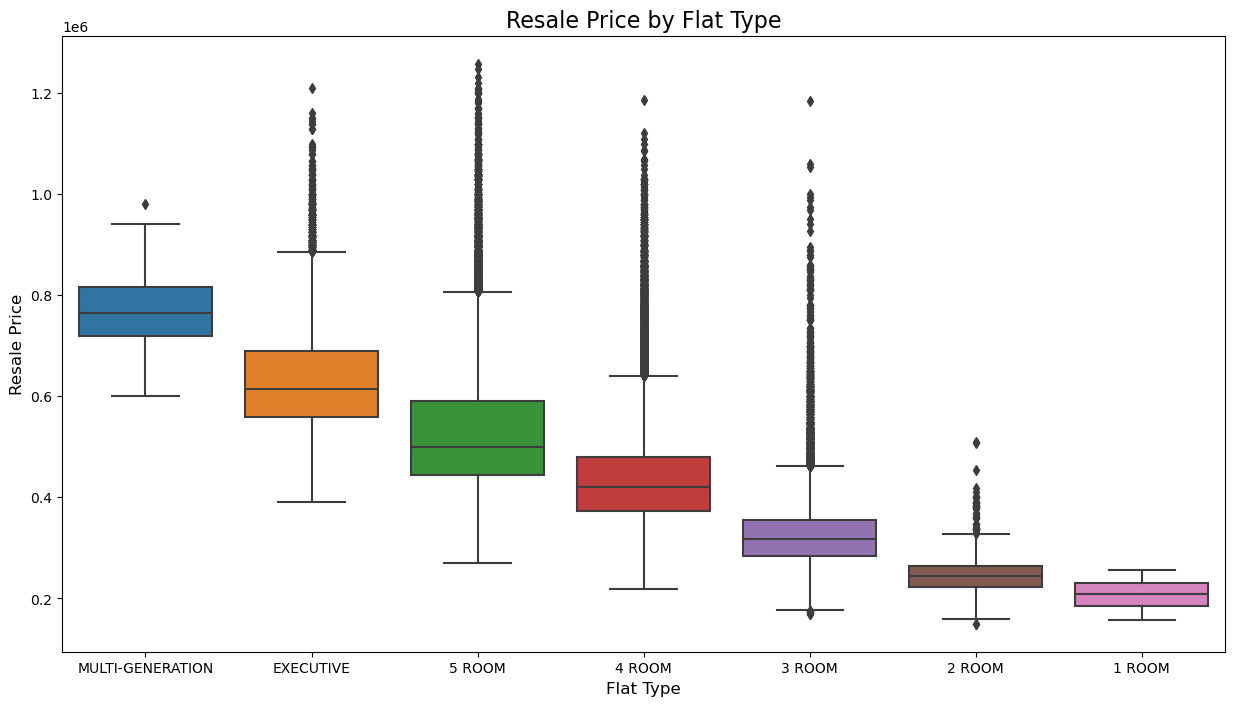

In [24]:
#boxplot of resale price by flat type, ordering done from highest to lowest median resale price
fig,axes=plt.subplots(figsize=(15,8))
sns.boxplot(y='resale_price', x='flat_type', data=housing_df,
            order=housing_df.groupby('flat_type')['resale_price'].median()
            .sort_values(ascending=False).index).set_title("Resale Price by Flat Type",fontsize=16)
plt.xlabel(xlabel='Flat Type', fontsize=12)
plt.ylabel(ylabel='Resale Price',fontsize=12)
plt.show()

From above boxplot, we observe that flat type has a significant influence on resale price.

#### 2. Flat Model

In [25]:
# median price sort by flat model, descending order
housing_df.groupby('flat_model')['resale_price'].median().sort_values(ascending=False)

flat_model
Type S2                   1000000.0
Type S1                    900000.0
Premium Apartment Loft     879000.0
Terrace                    815000.0
Multi Generation           765500.0
DBSS                       745000.0
Premium Maisonette         735000.0
Model A-Maisonette         700000.0
Adjoined flat              690500.0
Improved-Maisonette        670000.0
Maisonette                 652000.0
Apartment                  605000.0
Premium Apartment          468000.0
Improved                   450000.0
Model A                    413000.0
Model A2                   365000.0
Simplified                 350000.0
New Generation             340294.0
Standard                   328000.0
2-room                     245000.0
Name: resale_price, dtype: float64

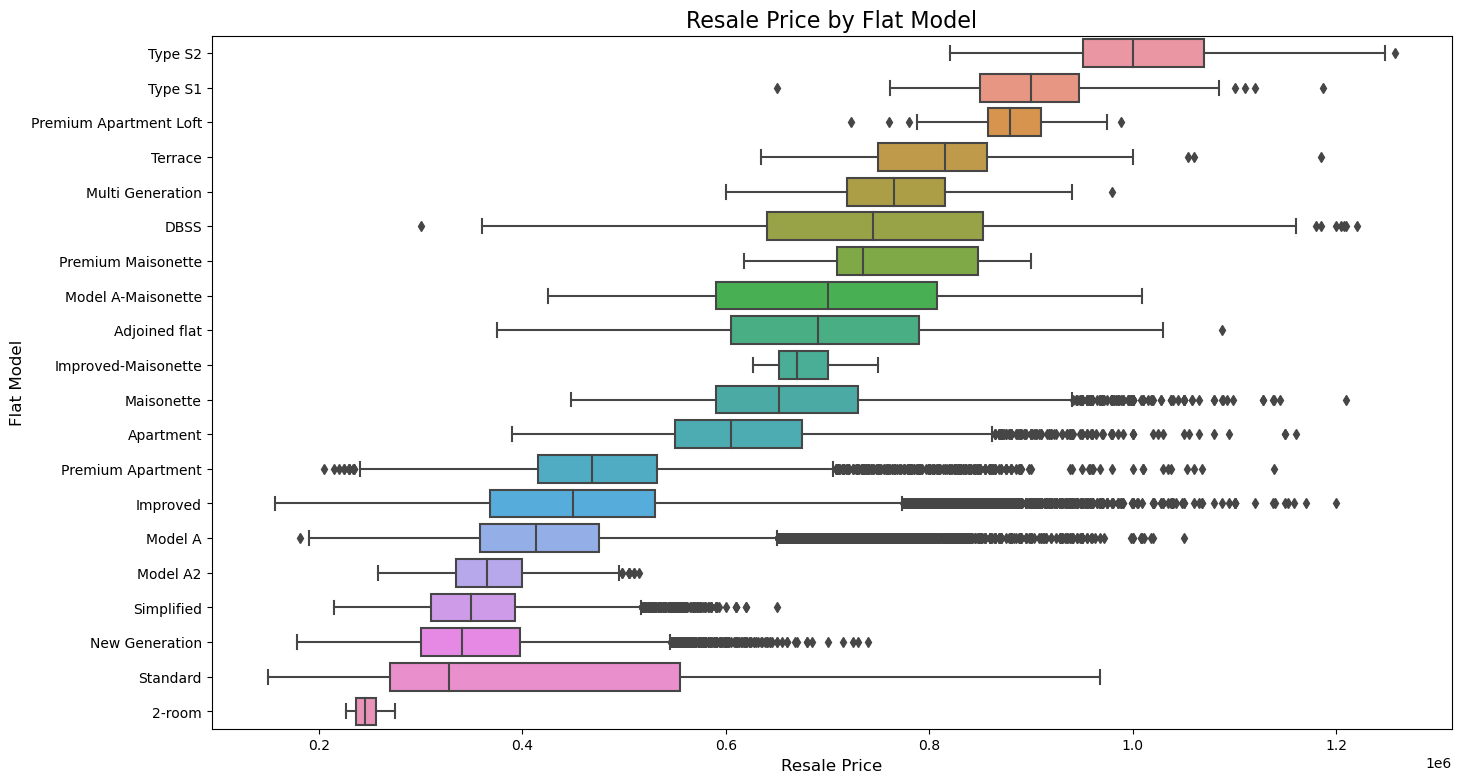

In [26]:
#boxplot of resale price by flat model, ordering done from highest to lowest median resale price
fig,axes=plt.subplots(figsize=(16,9))
sns.boxplot(x='resale_price', y='flat_model', data=housing_df,
            order=housing_df.groupby('flat_model')['resale_price'].median()
            .sort_values(ascending=False).index).set_title("Resale Price by Flat Model",fontsize=16)
plt.ylabel(ylabel='Flat Model', fontsize=12)
plt.xlabel(xlabel='Resale Price',fontsize=12)
plt.show()

From above boxplot, we observe that flat model has a significant influence on resale price.

#### 3. Planning Area

In [27]:
# median price sort by planning area, descending order
housing_df.groupby('planning_area')['resale_price'].median().sort_values(ascending=False)

planning_area
Tanglin                    828000.0
Bukit Timah                705500.0
Outram                     680000.0
Downtown Core              650000.0
Bishan                     595000.0
Bukit Merah                568000.0
Queenstown                 520000.0
Pasir Ris                  483000.0
Kallang                    474800.0
Marine Parade              470000.0
Serangoon                  463888.0
Punggol                    460000.0
Tampines                   456000.0
Sengkang                   449000.0
Rochor                     439500.0
Western Water Catchment    430000.0
Bukit Panjang              425000.0
Hougang                    418000.0
Jurong West                410000.0
Clementi                   408000.0
Sembawang                  405500.0
Choa Chu Kang              401000.0
Novena                     400000.0
Jurong East                395000.0
Toa Payoh                  392000.0
Woodlands                  390000.0
Bedok                      380000.0
Geylang       

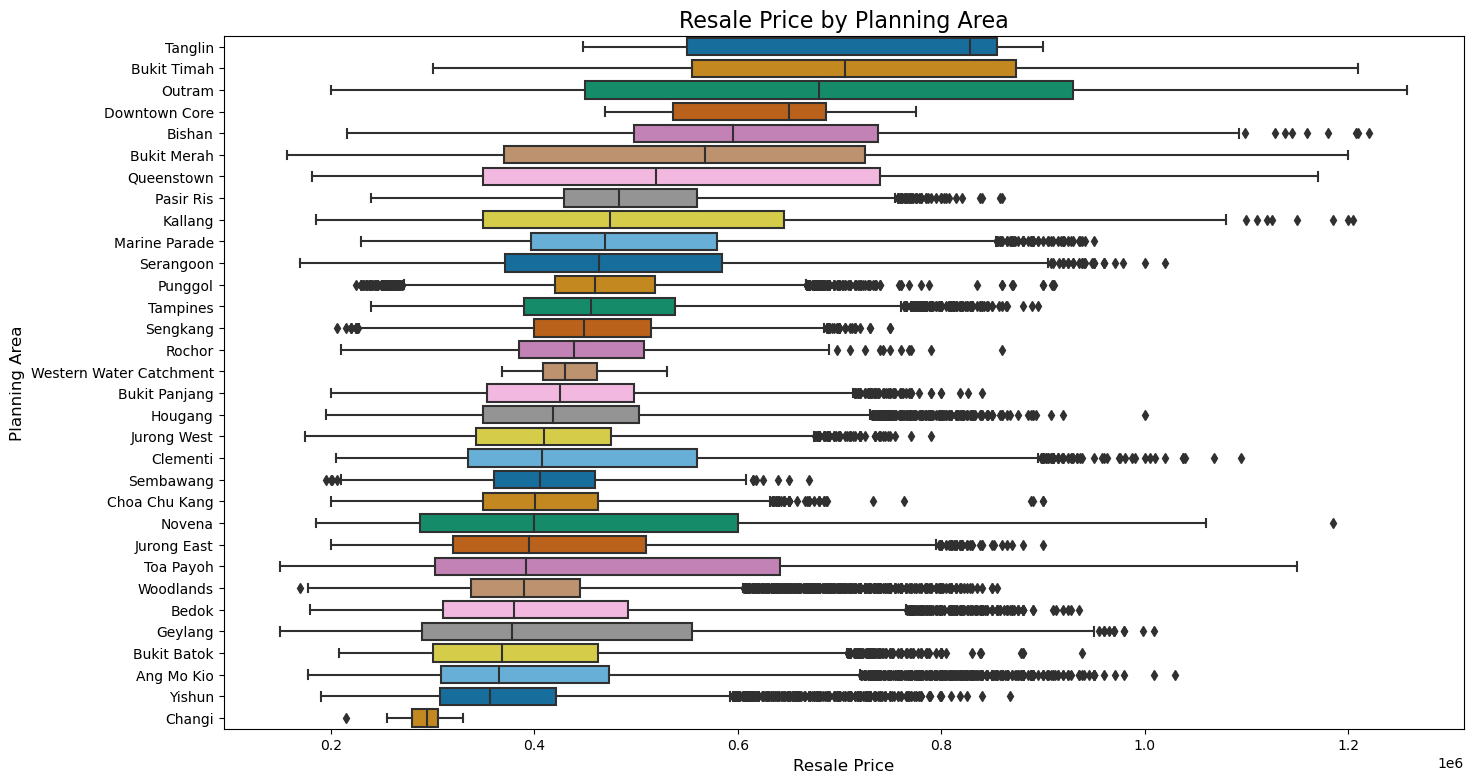

In [28]:
#boxplot of resale price by planning area, ordering done from highest to lowest median resale price
fig,axes=plt.subplots(figsize=(16,9))
sns.boxplot(x='resale_price', y='planning_area', data=housing_df, order=housing_df.groupby('planning_area')['resale_price'].median()
            .sort_values(ascending=False).index, palette="colorblind").set_title("Resale Price by Planning Area",fontsize=16)
plt.ylabel(ylabel='Planning Area', fontsize=12)
plt.xlabel(xlabel='Resale Price',fontsize=12)
plt.show()

From above boxplot, we observe that different government planning areas for housing in Singapore command different resale prices.

#### 4. Town

In [29]:
# median price sort by town, descending order
housing_df.groupby('town')['resale_price'].median().sort_values(ascending=False)

town
BUKIT TIMAH        708000.0
BISHAN             595000.0
BUKIT MERAH        568000.0
QUEENSTOWN         523000.0
CENTRAL AREA       500000.0
PASIR RIS          480000.0
MARINE PARADE      472000.0
SERANGOON          463888.0
PUNGGOL            460000.0
TAMPINES           456000.0
KALLANG/WHAMPOA    450000.0
SENGKANG           449000.0
BUKIT PANJANG      425000.0
HOUGANG            418000.0
JURONG WEST        410000.0
CLEMENTI           408000.0
SEMBAWANG          405500.0
CHOA CHU KANG      401100.0
JURONG EAST        395000.0
TOA PAYOH          392000.0
WOODLANDS          390000.0
BEDOK              380000.0
GEYLANG            378000.0
BUKIT BATOK        368880.0
ANG MO KIO         365000.0
YISHUN             357000.0
Name: resale_price, dtype: float64

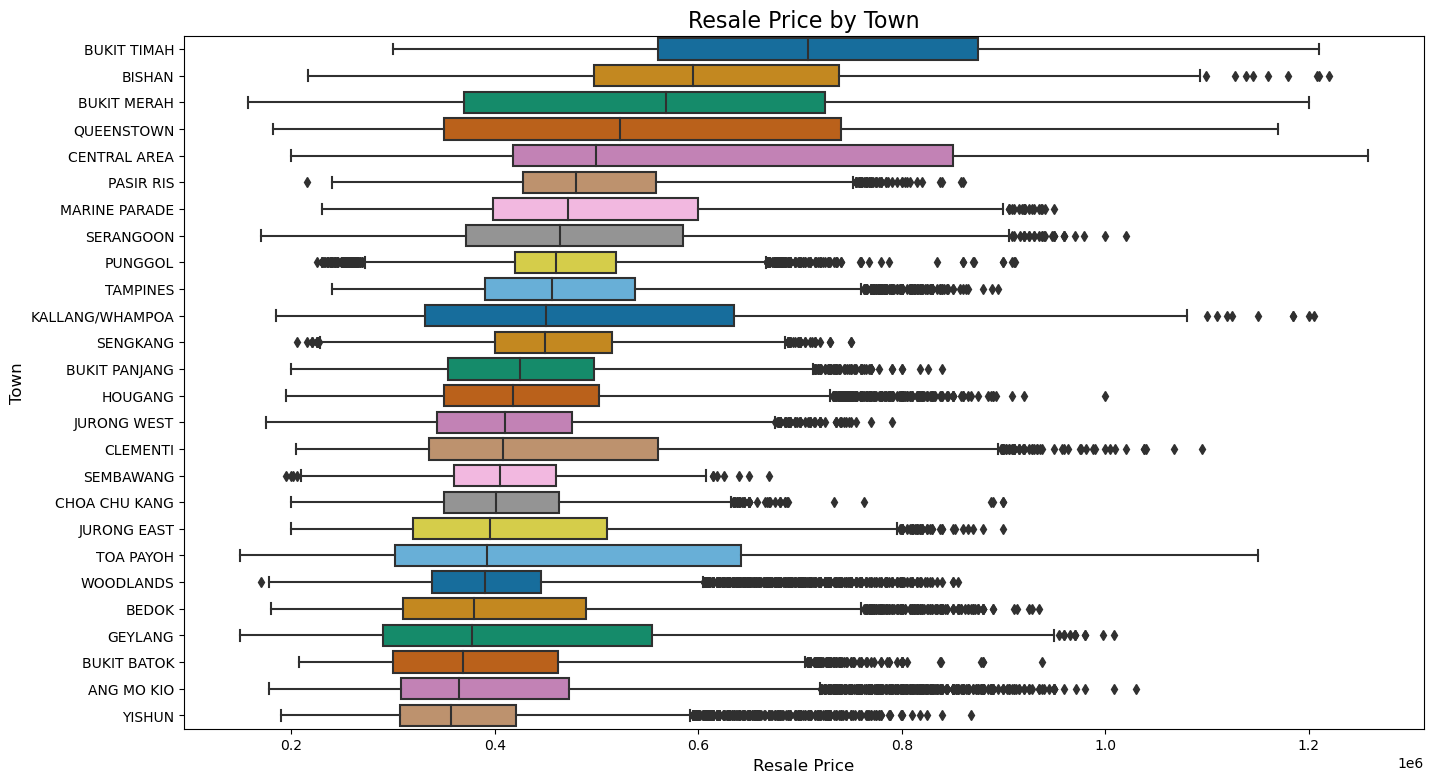

In [30]:
#boxplot of resale price by flat model, ordering done from highest to lowest median resale price
fig,axes=plt.subplots(figsize=(16,9))
sns.boxplot(x='resale_price', y='town', data=housing_df, order=housing_df.groupby('town')['resale_price'].median()
            .sort_values(ascending=False).index, palette="colorblind").set_title("Resale Price by Town",fontsize=16)
plt.ylabel(ylabel='Town', fontsize=12)
plt.xlabel(xlabel='Resale Price',fontsize=12)
plt.show()

From above boxplot, we observe that different HDB township where flat is located in Singapore command different resale prices.

#### 5. Other neighbourhood facilities

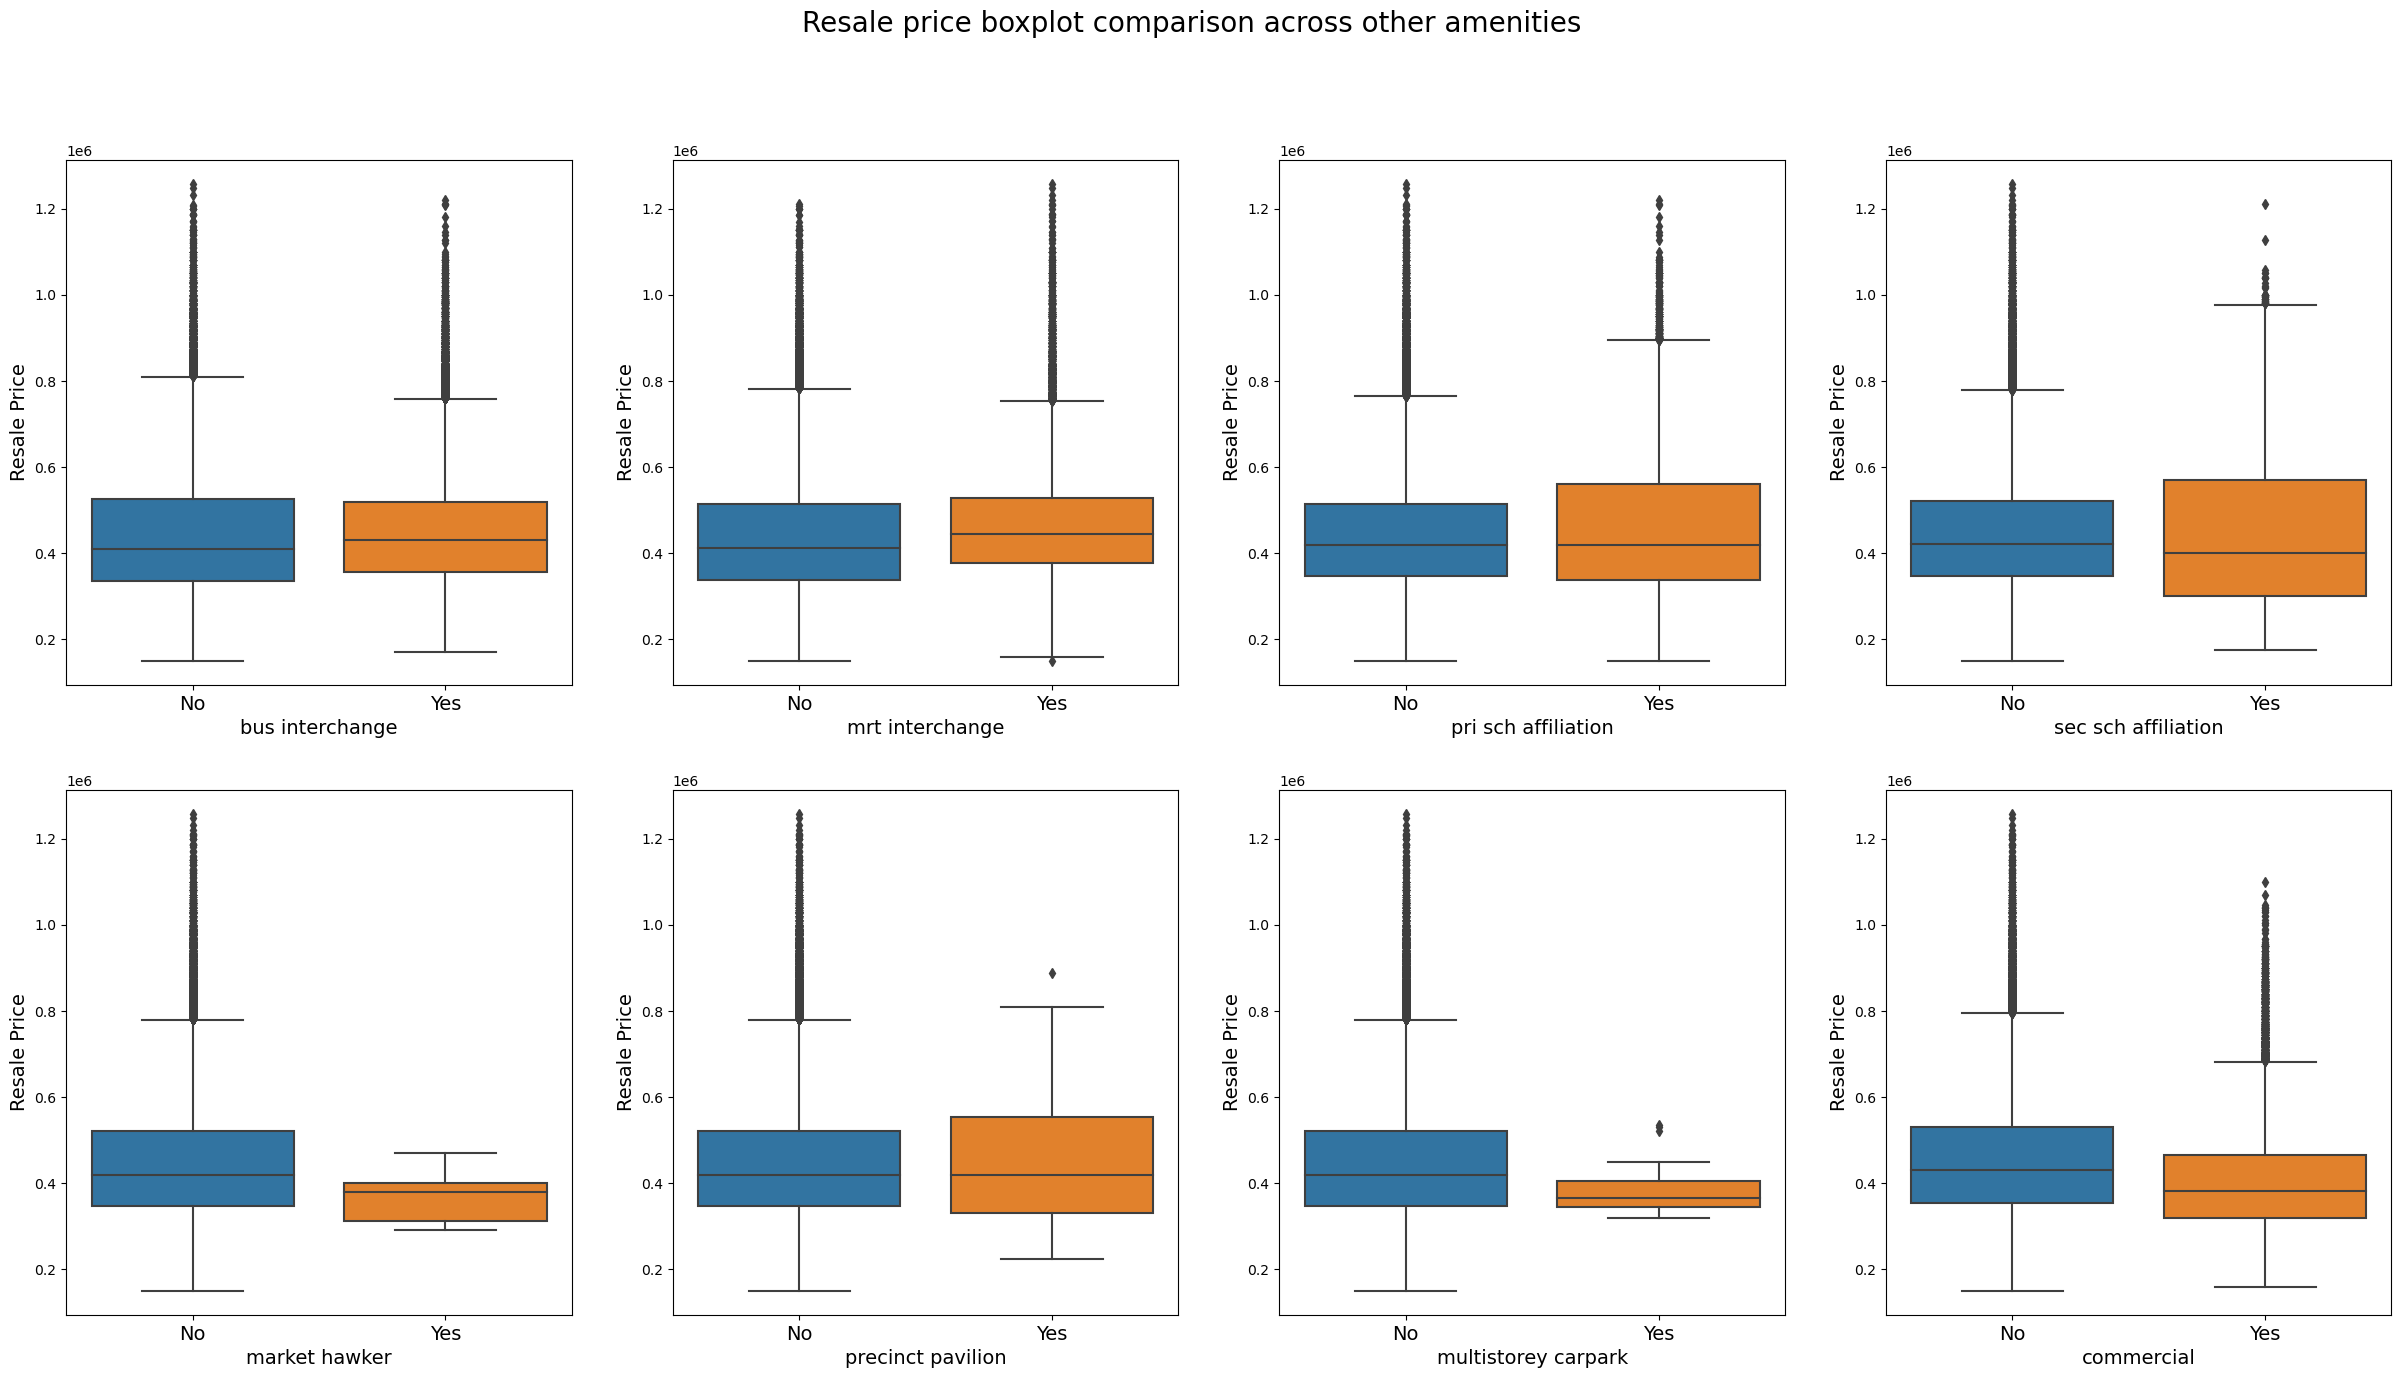

In [31]:
#to check resale price response against other numeric variables (those that consist of 1s and 0s, 1=Yes and 0=No)

var=['bus_interchange','mrt_interchange','pri_sch_affiliation','sec_sch_affiliation','market_hawker',
     'precinct_pavilion','multistorey_carpark','commercial']
i=0
fig,axes=plt.subplots(2,4,figsize=(30,15))
for k in range(len(var)):
    sns.boxplot(y='resale_price',x=var[k],data=housing_df,ax=axes[i//4,i%4])
    axes[i//4,i%4].set_ylabel(ylabel='Resale Price', fontsize=14)
    axes[i//4,i%4].set_xticklabels(['No','Yes'],fontsize=14)
    axes[i//4,i%4].set_xlabel(xlabel=var[k].replace('_',' '),fontsize=14)
    i+=1
fig.suptitle('Resale price boxplot comparison across other amenities',fontsize=20)       
plt.show()

We aim to check if these neighbourhood facilities are significant in determining resale price regardless of flat type/model. From above boxplots, we do not observe any significant change in resale price in the presence/absence of these features.

### Removing Multicollinearity

A crucial factor in linear regression modelling is to analyse the relationship between each independent variable and the dependent variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable, assuming all other independent variables are held constant.

Multicollinearity occurs when several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1. When independent variables are correlated, it indicates that changes in one variable are associated with shifts in other variables. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable on a 1 to 1 basis, hence lowering the accuracy of the estimated coefficients and therefore resulting in less reliable statistical inferences.

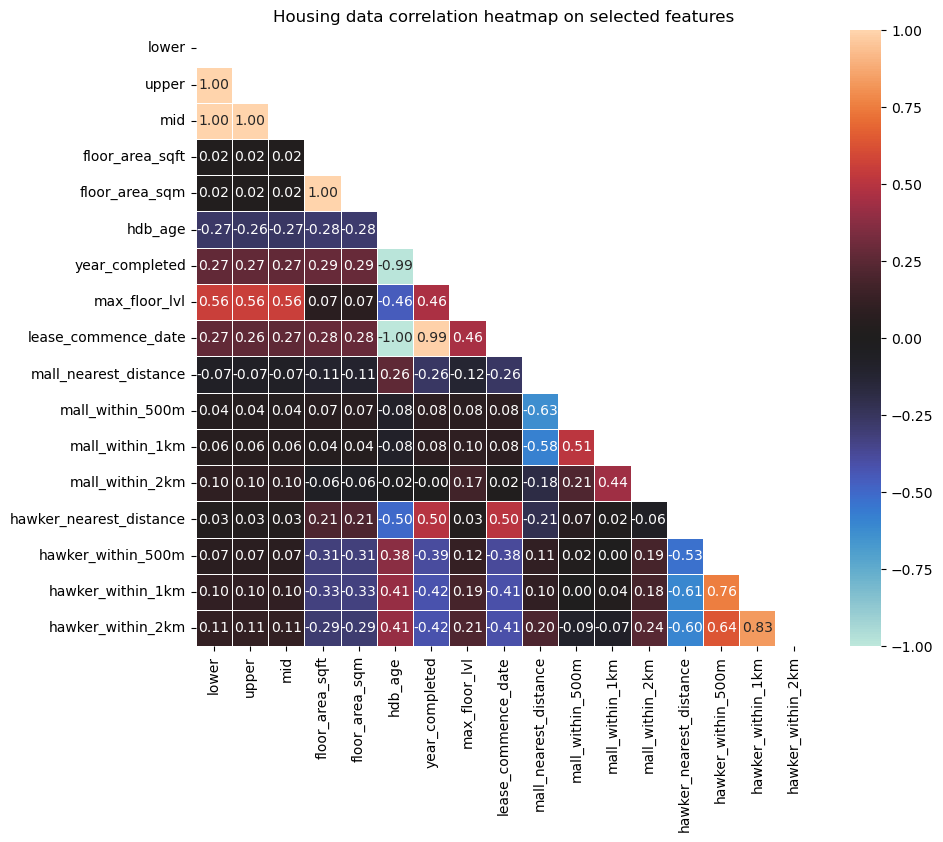

In [32]:
# to check for multicollinearity among independent variables

fig, ax = plt.subplots(figsize=(10,8)) 
mc=housing_df[['lower','upper','mid','floor_area_sqft','floor_area_sqm','hdb_age','year_completed','max_floor_lvl',
               'lease_commence_date','mall_nearest_distance','mall_within_500m', 'mall_within_1km', 'mall_within_2km',
               'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km','hawker_within_2km']]
mask=np.triu(np.ones_like(mc.corr()))
sns.heatmap(mc.corr(),mask=mask,
            annot=True, linewidths=0.5, square=True,
            center=0, fmt='0.2f')
plt.title('Housing data correlation heatmap on selected features')
plt.show()

From above heatmap, we observe several correlations between independent variables.

1. Correlation between hdb_age, lease_commence_date and year_completed: 
    <br>
    HDB age is the difference between current year and lease commencement year, and the year completed can be expressed as a linear function of the lease commencement year, therefore high correlation is expected.<br><br>
2. Correlation between upper, mid and lower:
   <br>
   Mid is the average of upper and lower values, high correlation is expected.<br><br>
3. Correlation between floor_area_sqft and floor_area_sqm:
   <br>
   Area unit conversion between variables, high correlation is expected.

In the context of our model, we will be using hdb_age, mid and floor_area_sqft only to avoid multicollinearity. HDB age is easier to interpret as it reflects the "age" or remaining lease of a housing unit, as compared to year_completed or lease_commence_date. Square feet is a common metric used to represent the area of a housing unit.

### Resale price correlation study with housing features

In [ ]:
# corr between resale price and hdb age
ax=sns.lmplot(x='hdb_age',y='resale_price',
              scatter_kws={'s':0.5},line_kws={'color':'red'},data=housing_df,height=6,aspect=1.2)
ax.set(xlabel='HDB Age', ylabel='Resale Price')
plt.title('Correlation between resale price and HDB age',fontsize=10)
plt.show()

We observe resale price decreases with HDB age, this makes sense as older units tend to be less appealing, especially to the younger buyers that are not able to utilise their full CPF or due to a building's deteriorating exterior condition that puts buyers off.

In [ ]:
# corr between resale price and floor area
ax=sns.lmplot(x='floor_area_sqft',y='resale_price',
           scatter_kws={'s':0.5},line_kws={'color': 'black'},data=housing_df,height=6, aspect=1.2)
ax.set(xlabel='Floor Area', ylabel='Resale Price')
plt.title('Correlation between resale price and floor area (sqft)',fontsize=10)
plt.show()

We observe resale price increases with floor area, this makes sense as land is scarce in Singapore and people would have to pay more to get a larger home.

In [ ]:
# corr between resale price and middle of storey range
ax=sns.lmplot(x='mid',y='resale_price',
           scatter_kws={'s':0.5},line_kws={'color': 'black'},data=housing_df,height=6, aspect=1.2)
ax.set(xlabel='Middle of storey range', ylabel='Resale Price')
plt.title('Correlation between resale price and middle of storey range',fontsize=10)
plt.show()

We observe resale price increases with storey range, this makes sense as units located on the higher floors are preferred. At the lower levels, it might be noiser or dirtier as the units are generally closer to the rubbish chutes. The quality of air might be another factor at play here as well.

In [ ]:
# corr between resale price and max floor level
ax=sns.lmplot(x='max_floor_lvl',y='resale_price',
           scatter_kws={'s':0.5},line_kws={'color': 'black'},data=housing_df,height=6, aspect=1.2)
ax.set(xlabel='Max Floor Level', ylabel='Resale Price')
plt.title('Correlation between resale price and max floor level',fontsize=10)
plt.show()

Same observation as middle storey range, generally resale price increases. The higher the maximum floor level, the more appealing to buyers as it appears that they would have more privacy since there's a higher chance of avoiding the lower levels.

In [ ]:
# corr between resale price and mrt nearest distance
ax=sns.lmplot(x='mrt_nearest_distance',y='resale_price',
           scatter_kws={'s':0.5},line_kws={'color': 'black'},data=housing_df,height=6,aspect=1.2)
ax.set(xlabel='Nearest distance from MRT', ylabel='Resale Price')
plt.title('Correlation between resale price and nearest distance from MRT',fontsize=10)
plt.show()

Resale price decreases as the distance from housing unit to MRT increases. This is probably due to the fact that the value of a unit increases as it is nearer to various amenities/facilities.

In [ ]:
# corr between resale price and hawker nearest distance
ax=sns.lmplot(x='hawker_nearest_distance',y='resale_price',
           scatter_kws={'s':0.5},line_kws={'color': 'black'},data=housing_df,height=6,aspect=1.2)
ax.set(xlabel='Nearest distance from hawker', ylabel='Resale Price')
plt.title('Correlation between resale price and nearest distance from hawker',fontsize=10)
plt.show()

Resale price decreases as the distance from housing unit to hawker centres increases. However the decrease is not very significant, this might suggest that it is not a huge concern as people have different food preferences or they can get food from other places (eg. fast food chains/markets/provision shops that are nearby)

In [ ]:
# corr between resale price and mall nearest distance
ax=sns.lmplot(x='mall_nearest_distance',y='resale_price',
           scatter_kws={'s':0.5},line_kws={'color': 'black'},data=housing_df,height=6,aspect=1.2)
ax.set(xlabel='Nearest distance from mall', ylabel='Resale Price')
plt.title('Correlation between resale price and nearest distance from mall',fontsize=10)
plt.show()

Resale price decreases as the distance from housing unit to malls increases. This is probably due to the fact that the value of a unit increases as it is nearer to various amenities/facilities.

In [ ]:
# corr between resale price and pri sch nearest distance
ax=sns.lmplot(x='pri_sch_nearest_distance',y='resale_price',
           scatter_kws={'s':0.5},line_kws={'color': 'black'},data=housing_df,height=6,aspect=1.2)
ax.set(xlabel='Nearest distance from primary school', ylabel='Resale Price')
plt.title('Correlation between resale price and primary school nearest distance',fontsize=10)
plt.show()

Resale price decreases as the distance from housing unit to primary schools increases. However the decrease is not very significant, this might suggest that it is not a huge concern as parents are able to send their children to school or there might be bus services provided by the school itself. Hence distance does not seem to be a major concern here.

In [ ]:
# corr between resale price and sec sch nearest distance
ax=sns.lmplot(x='sec_sch_nearest_dist',y='resale_price',
           scatter_kws={'s':0.5},line_kws={'color': 'black'},data=housing_df,height=6,aspect=1.2)
ax.set(xlabel='Nearest distance from secondary school', ylabel='Resale Price')
plt.title('Correlation between resale price and secondary school nearest distance',fontsize=10)
plt.show()

Resale price increases as the distance from housing unit to secondary schools increases. This does not seem to be intuitive, nevertheless we will include this observation into our modelling and verify the coefficients later.

In [ ]:
# save and export data for modelling after dropping columns
housing_df.to_csv("../datasets/modelling_housing_data.csv",index=False)